# Year Prediction for Songs

Second part of the project is bringing ANN in. We have utilized the code of the textbook we have been reading, which can be found [here](http://neuralnetworksanddeeplearning.com/chap3.html). We have modified loader script so that it loads the Million Song Dataset instead.

We will try several things:

- Artificial Neural Network with no Hidden Layer (Naive Try)
- Deep Neural Network
- A more complex Convolutional Neural Network Structure


# (1) Artificial Neural Network with no Hidden Layer


As explained above, we have modified the loader script. The code will start by calling the piece that loads the data.

In [18]:
import loader
import network2

training_data, test_data = loader.load_data_wrapper()

In [ ]:
net = network2.Network([90,90], cost=network2.CrossEntropyCost) 
net.large_weight_initializer()

evaluation_cost, evaluation_accuracy, training_cost, training_accuracy =\
    net.SGD(training_data, 30, 10, 0.5,
        evaluation_data=test_data, lmbda = 0.1,
        monitor_evaluation_cost=True, monitor_evaluation_accuracy=True,
        monitor_training_cost=True, monitor_training_accuracy=True)

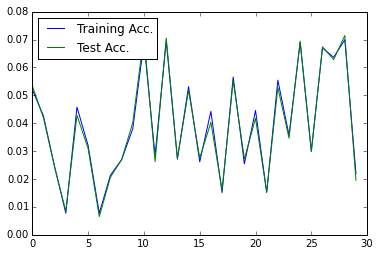

In [33]:
#30 epoch of Shallow NN

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

training_accuracy = np.array([24146, 19740, 11306, 3595, 21213, 14844, 3593, 9908, 12481, 17614, 32015, 13160, 32208, 12579, 24630, 12128, 20511, 7014, 26218, 11787, 20669, 7055, 25695, 16553, 31979, 13903, 31048, 29503, 32423, 10164]).astype(float)
evaluation_accuracy = np.array([2757, 2162, 1249, 436, 2210, 1595, 337, 1067, 1390, 2075, 3687, 1353, 3640, 1415, 2674, 1420, 2081, 828, 2847, 1405, 2157, 792, 2728, 1789, 3584, 1539, 3479, 3241, 3688, 1009]).astype(float)

training_accuracy   /= 463715
evaluation_accuracy /= 51630

plt.plot(xrange(0,30),training_accuracy,label="Training Acc.")
plt.plot(xrange(0,30),evaluation_accuracy,label="Test Acc.")
plt.legend(loc=0)

As it can be seen, the results are very bad, our accuracy goes between 2%-5%, with maximum 6.99%. And the cost was always "infinite", whether the cost function was a sq. or cross entropy.

# (2) Deep Neural Network

The only difference here is to go from [90,90] to [90,30,90].

In [ ]:
net = network2.Network([90,30,90], cost=network2.CrossEntropyCost) 
net.large_weight_initializer()

evaluation_cost, evaluation_accuracy, training_cost, training_accuracy =\
    net.SGD(training_data, 30, 10, 0.5,
        evaluation_data=test_data, lmbda = 0.1,
        monitor_evaluation_cost=True, monitor_evaluation_accuracy=True,
        monitor_training_cost=True, monitor_training_accuracy=True)

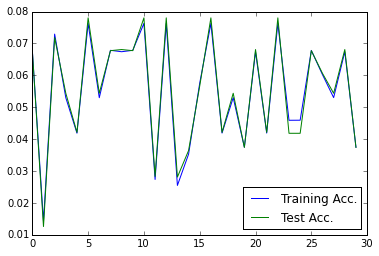

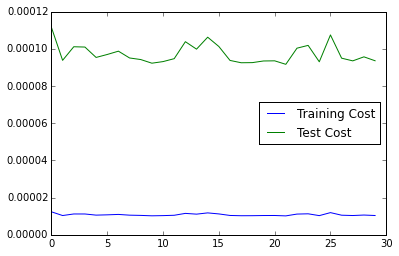

In [32]:
#30 epoch of Deep NN

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

training_accuracy = np.array([31452, 6606, 33825, 24574, 19419, 35374, 24574, 31465, 31262, 31462, 35384, 12680, 35376, 11816, 16359, 26693, 35382, 19436, 24584, 17371, 31258, 19433, 35382, 21292, 21303, 31454, 27926, 24588, 31252, 17375]).astype(float)
evaluation_accuracy = np.array([3498, 650, 3710, 2808, 2175, 4029, 2808, 3498, 3516, 3498, 4029, 1461, 4029, 1451, 1880, 2927, 4029, 2175, 2808, 1931, 3516, 2175, 4029, 2160, 2160, 3498, 3130, 2808, 3516, 1931]).astype(float)
training_cost = np.array([5.7283112983237796, 4.8033541359119019, 5.1932558794930266, 5.1892527989240094, 4.9051238310286873, 4.9781750825655076, 5.0795370809438616, 4.8948385540726962, 4.8359232470777185, 4.7359558265867943, 4.7829262469983291, 4.8690878214640945, 5.3379189562762255, 5.1495440681666098, 5.4621364331180917, 5.204772536502837, 4.8227385437011083, 4.7553818635169449, 4.7650327348334596, 4.8043596587935395, 4.8150343891485008, 4.7167512430189635, 5.1662904869796797, 5.2340412977201165, 4.7812833522836167, 5.5299277050760196, 4.884955157258914, 4.8045492126481602, 4.9244195332971135, 4.8070498920543834]).astype(float)
evaluation_cost = np.array([5.7549867095732994, 4.8426825603677095, 5.2199347098679043, 5.2114212295768985, 4.9232706724425732, 5.0053529092627542, 5.0972940999561871, 4.9084981768386893, 4.8647139081333286, 4.7635804181538166, 4.8079358201127214, 4.8891348025388064, 5.3605352241013238, 5.1532963582671663, 5.4850514805737873, 5.2269841970624213, 4.8400956409043641, 4.7758767311570125, 4.7793186268704604, 4.8249411015315884, 4.8292398308990112, 4.7320816228174385, 5.1801643394535022, 5.2578119909576149, 4.8025736921113893, 5.5477861633215628, 4.9026668337834103, 4.8280741209235893, 4.9398427898025057, 4.830814724568631]).astype(float)

training_accuracy   /= 463715
evaluation_accuracy /= 51630
training_cost   /= 463715
evaluation_cost /= 51630


plt.plot(xrange(0,30),training_accuracy,label="Training Acc.")
plt.plot(xrange(0,30),evaluation_accuracy,label="Test Acc.")
plt.legend(loc=0)
plt.show()

plt.plot(xrange(0,30),training_cost,label="Training Cost")
plt.plot(xrange(0,30),evaluation_cost,label="Test Cost")
plt.legend(loc=0)
plt.show()

So, we are still not getting the results we want..

# (3) Convolutional Neural Networks

In order to run this part, we need to install dependencies such as Theano.

In [ ]:
# import network3
# from network3 import Network
# from network3 import ConvPoolLayer, FullyConnectedLayer, SoftmaxLayer
# training_data, validation_data, test_data = network3.load_data_shared()
# mini_batch_size = 10
# net = Network([
#         FullyConnectedLayer(n_in=90, n_out=100),
#         SoftmaxLayer(n_in=100, n_out=90)], mini_batch_size)
# net.SGD(training_data, 60, mini_batch_size, 0.1, 
#         validation_data, test_data)

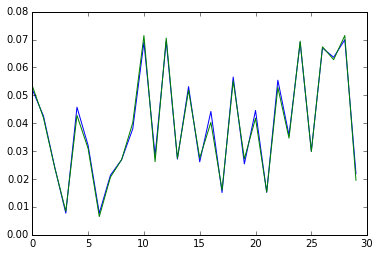